In [1]:
## Check the optimal location for 1D scans ##

# 1 - graph just one run
# 2 - Graph STRB1 step average waveforms
# 3 - Graph STRB2 step average waveforms
# 4 - Graph Incr1 step average waveforms
# 5 - Graph Incr2 step average waveforms

# Conclusion - STRB1 and STRB2 have a significant impact on glitches

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

In [4]:
## Start with just one run

(5001, 133)


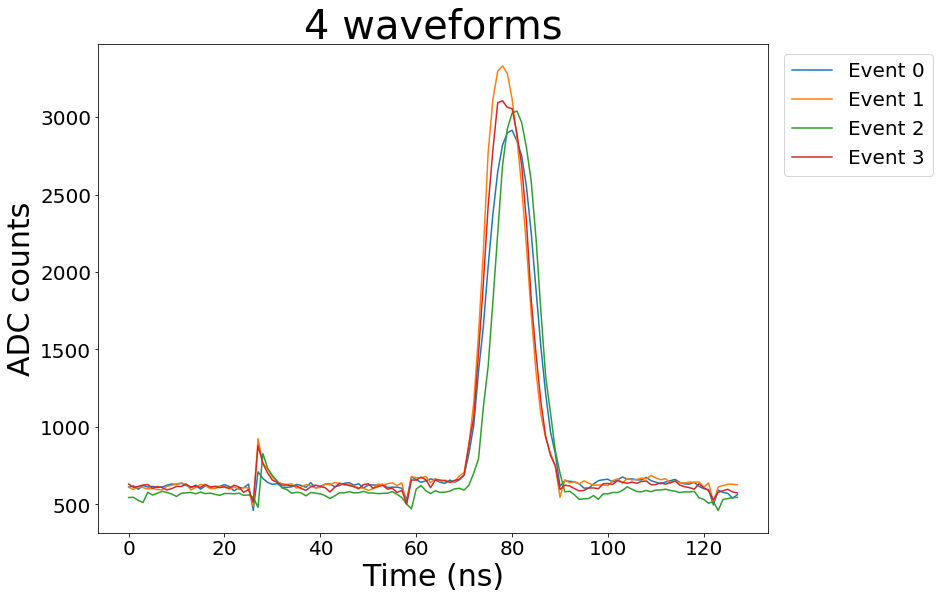

In [80]:
# Load data and plot the first few waveforms

d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches Original/sampleFileLarge_run319764ASIC0CH6.txt")
print(shape(d))

plt.plot(d[0][5:133], label = 'Event 0')
plt.plot(d[1][5:133], label = 'Event 1')
plt.plot(d[2][5:133], label = 'Event 2')
plt.plot(d[3][5:133], label = 'Event 3')
plt.title('4 waveforms')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

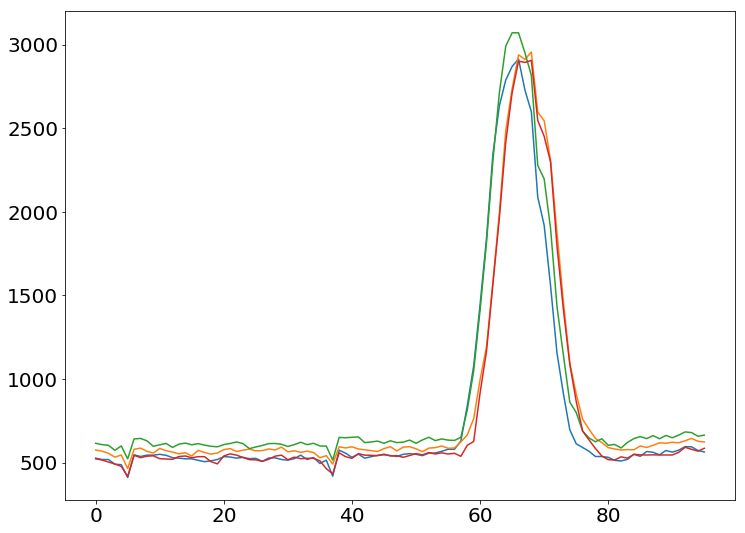

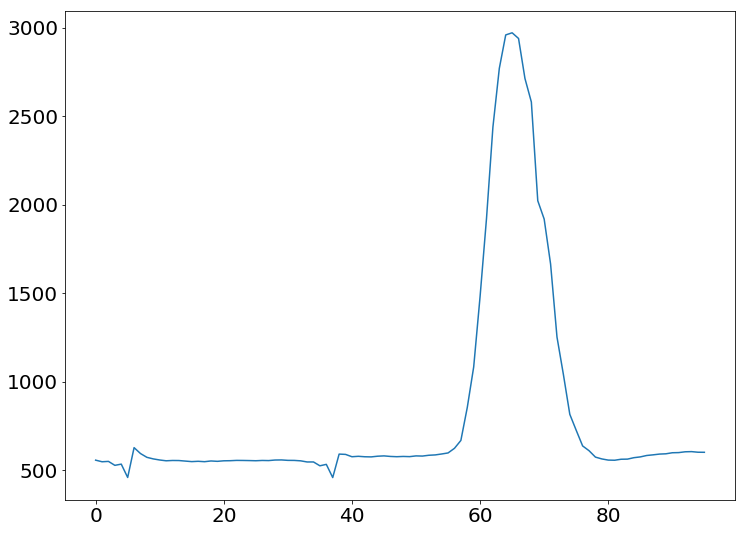

In [79]:
# shift over each event according to its phase shift then average

# Shift over the waveform according to its phase shift
waveforms = []
for event in range(5000):
    phase = int(d[event][4])
    shift = 32 - phase - 1
    waveforms.append(d[event][shift: shift + 96])
    
# Plot 100 shifted waveforms
for event in range(4):
    plt.plot(waveforms[event])
plt.show()

# Find the average shifted waveforms
avg = []
for point in range(96):
    a = []
    for event in range(5000):
        a.append(waveforms[event][point])
    avg.append(np.mean(a))
    
# Plot the average shifted waveform
plt.plot(avg)

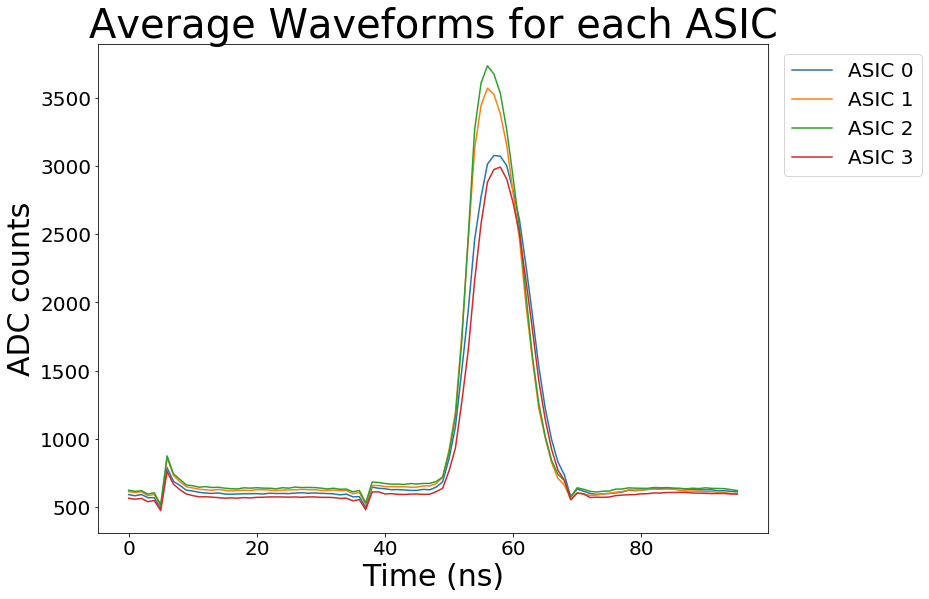

In [54]:
# Find and plot shifted average waveforms for original

ASIC_avg = []
for ASIC in range(4):
    d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches Original/sampleFileLarge_run319764ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(d[event][4])
        shift = 32 - phase - 1
        waveforms.append(d[event][shift: shift + 96])
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(5000):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    ASIC_avg.append(avg_waveform)
    plt.plot(avg_waveform, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveforms for each ASIC')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [ ]:
## STRB1

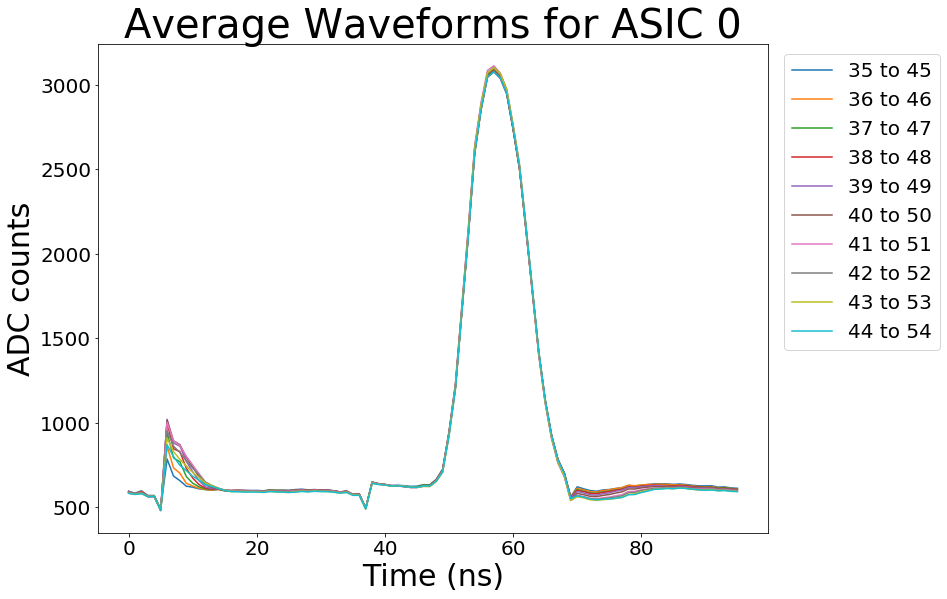

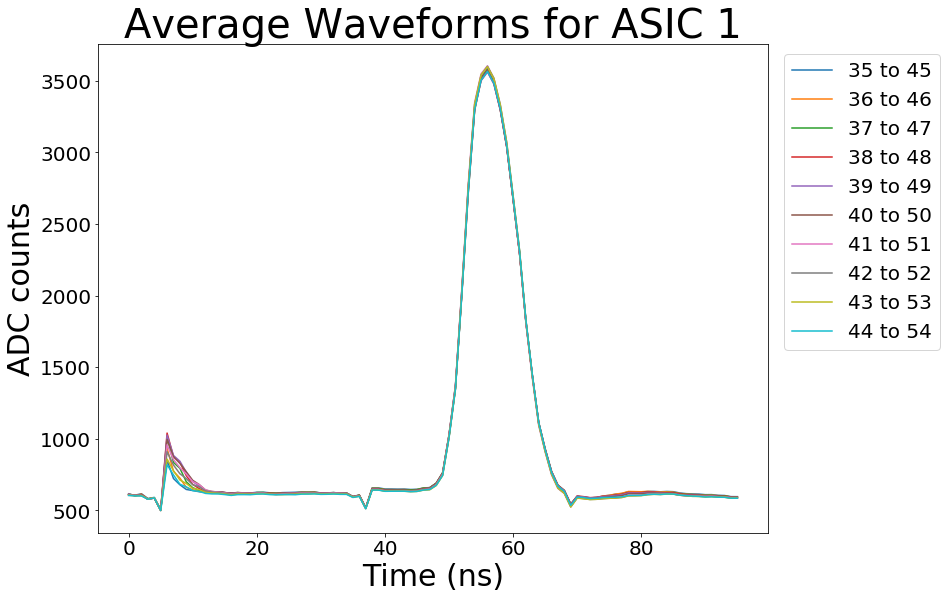

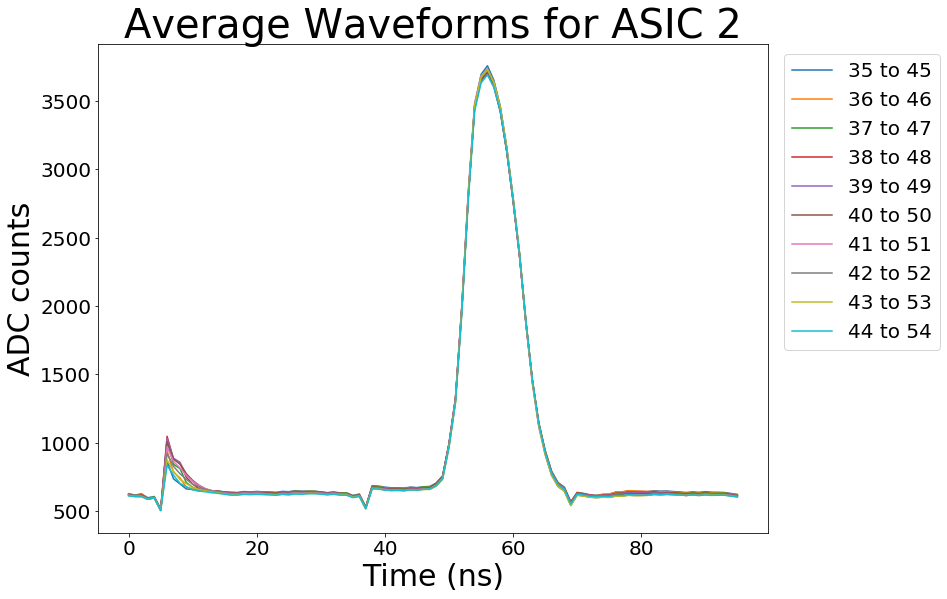

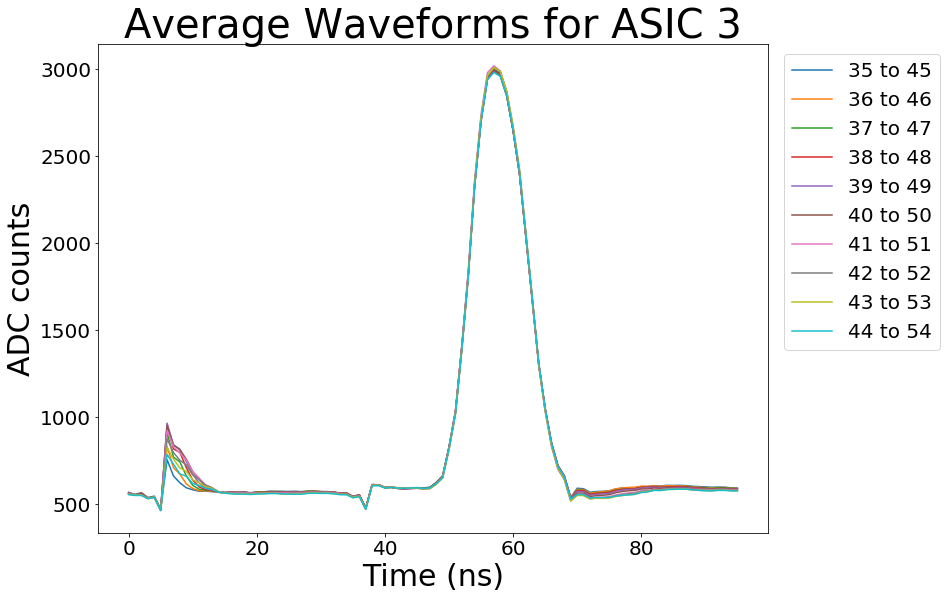

In [63]:
# Find and plot shifted average waveforms for each step
# STRB1 steps

ASIC_avgs_STRB1 = []
for ASIC in range(4):
    runs = []
    start_value = 35
    for run in range(797,807):
        d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches STRB1 Scan/sampleFileLarge_run319" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(d[event][4])
            shift = 32-phase-1
            waveforms.append(d[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10))
        start_value = start_value + 1
    ASIC_avgs_STRB1.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

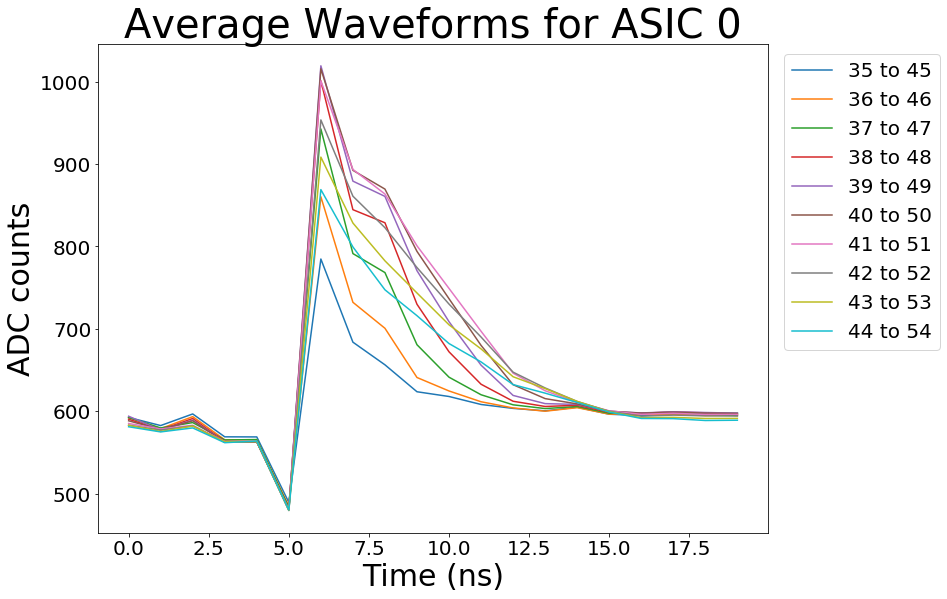

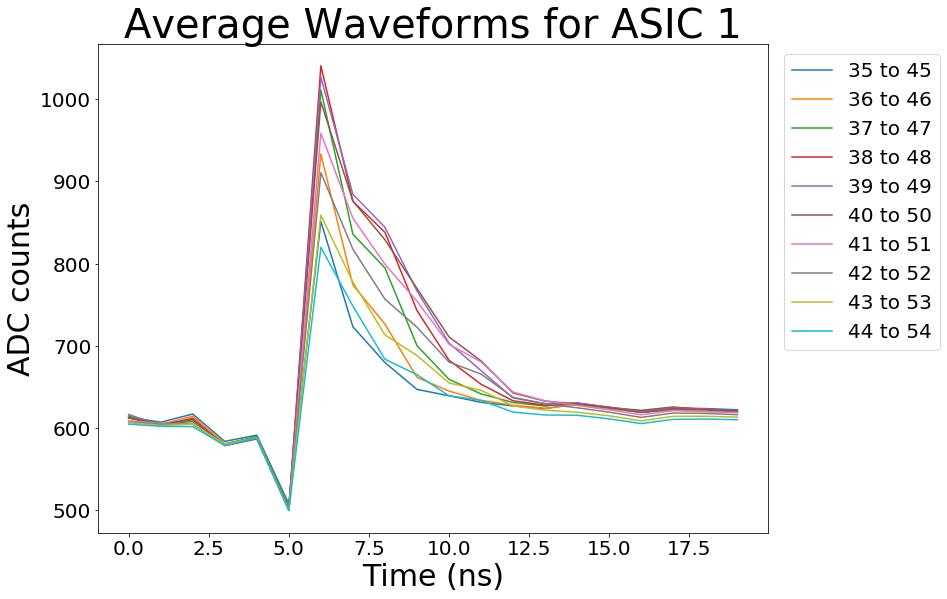

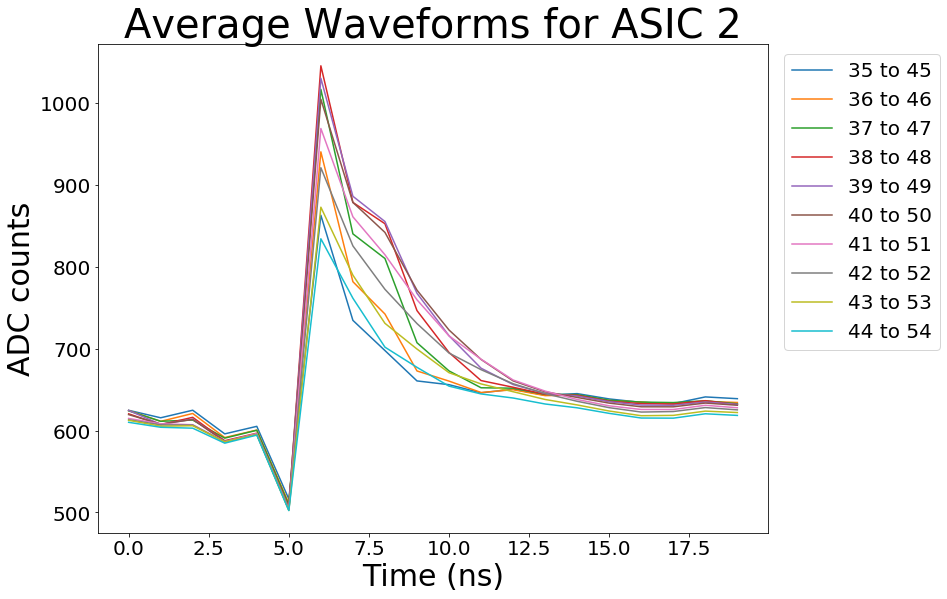

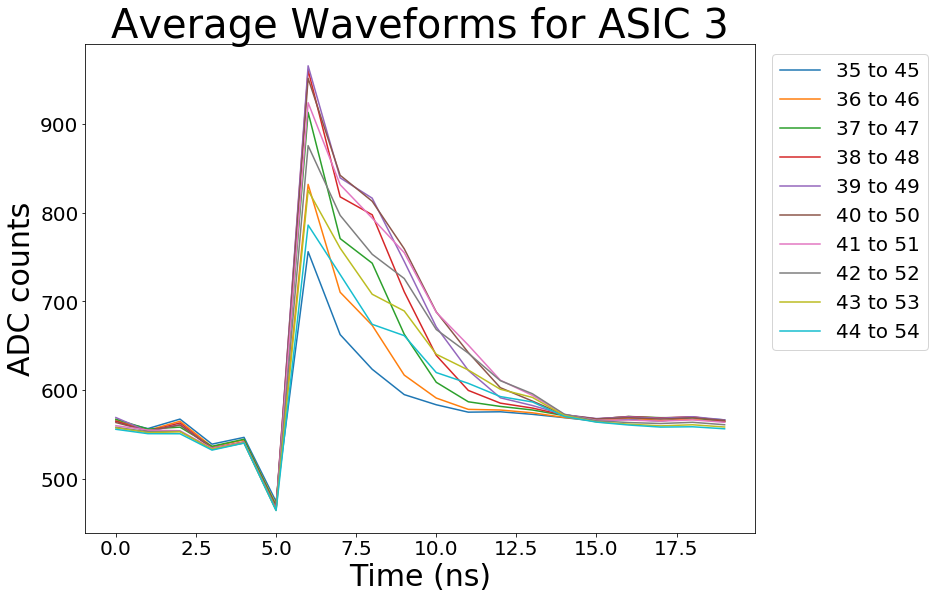

In [64]:
# Zoom in on just the first spike
# STRB1 steps

for ASIC in range(4):
    start_value = 35
    for run in range(10):
        plt.plot(ASIC_avgs_STRB1[ASIC][run][0:20], label = str(start_value) + ' to ' + str(start_value + 10))
        start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [61]:
## STRB2

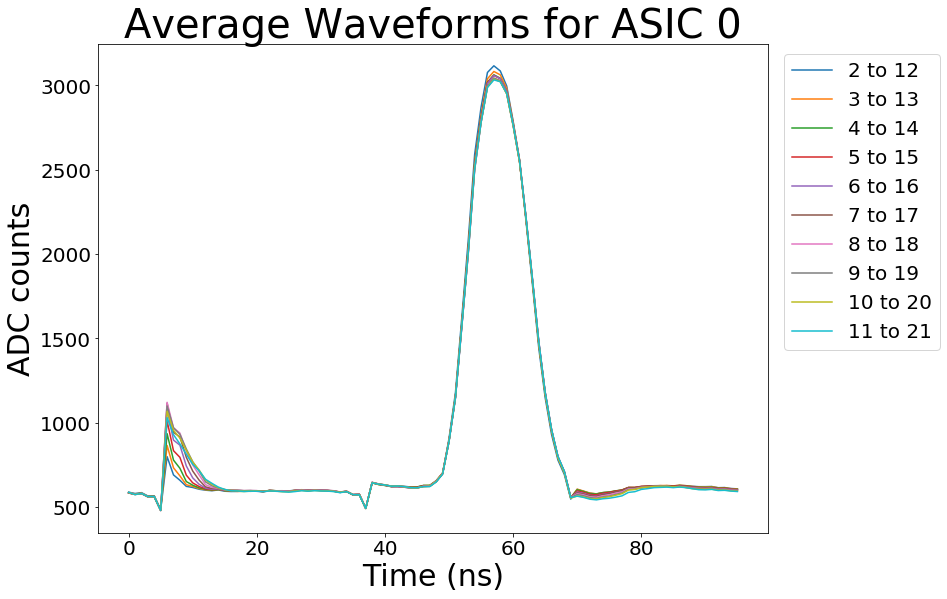

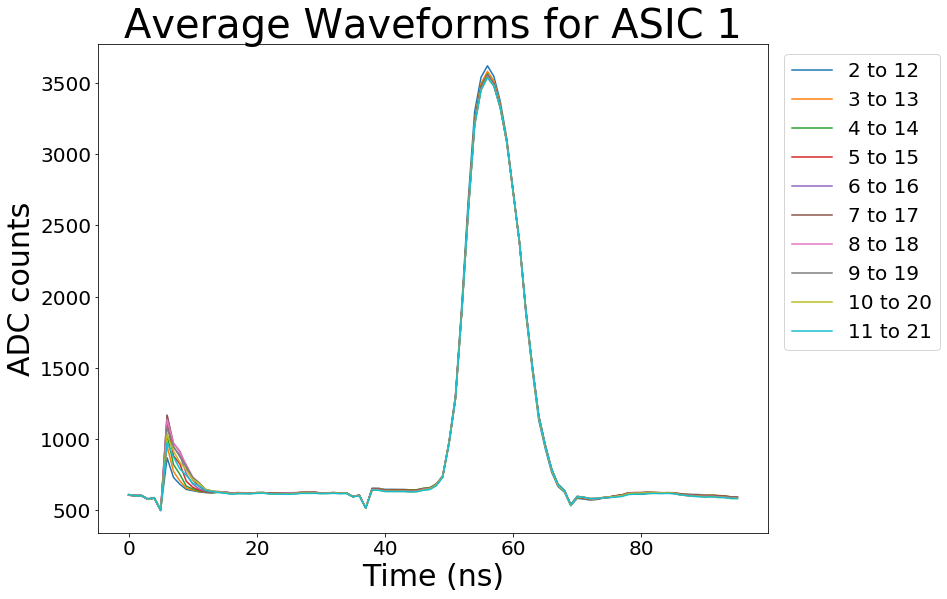

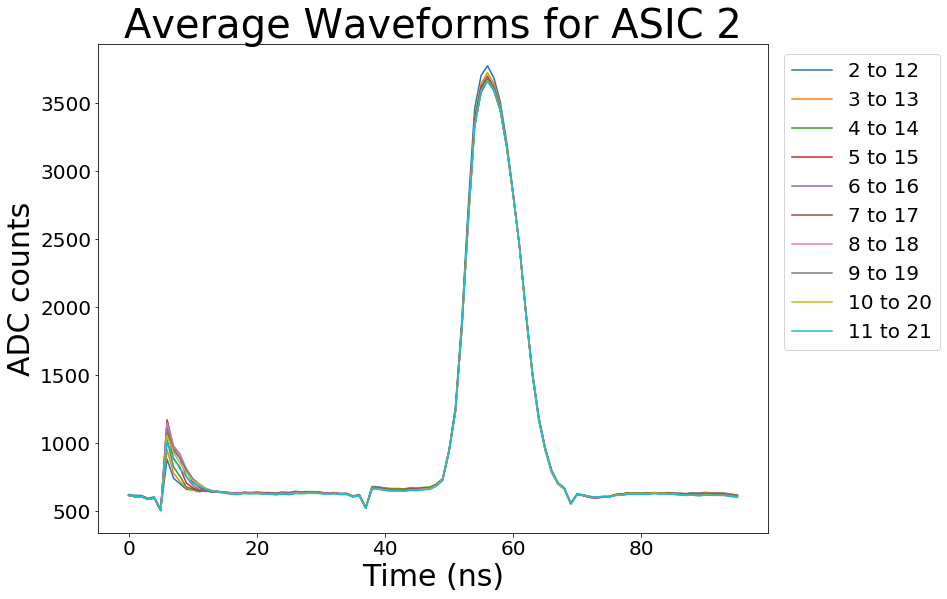

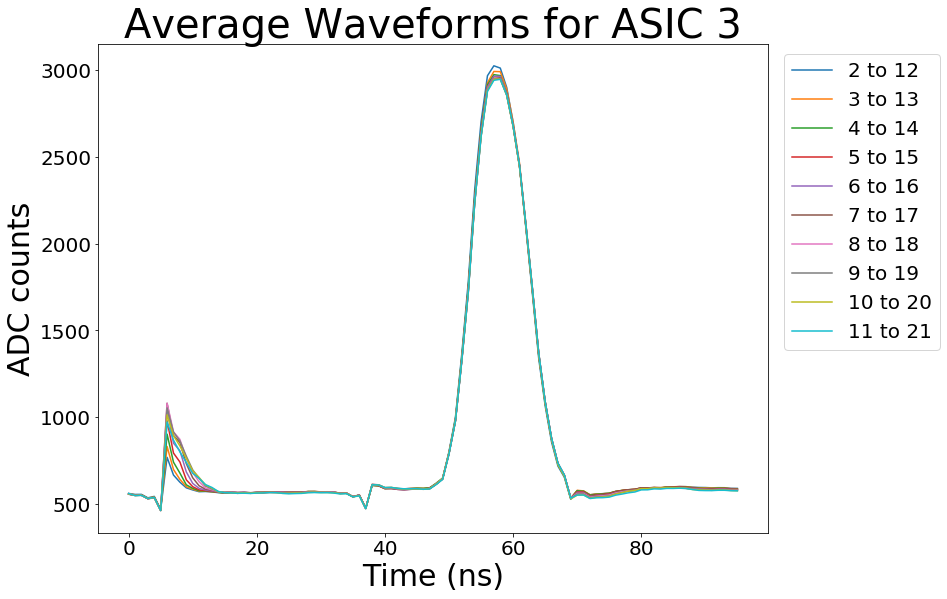

In [69]:
# Find and plot shifted average waveforms for each step
# STRB2 steps

ASIC_avgs_STRB2 = []
for ASIC in range(4):
    runs = []
    start_value = 2
    for run in range(787,797):
        d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches STRB2 Scan/sampleFileLarge_run319" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(d[event][4])
            shift = 32-phase-1
            waveforms.append(d[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10))
        start_value = start_value + 1
    ASIC_avgs_STRB2.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

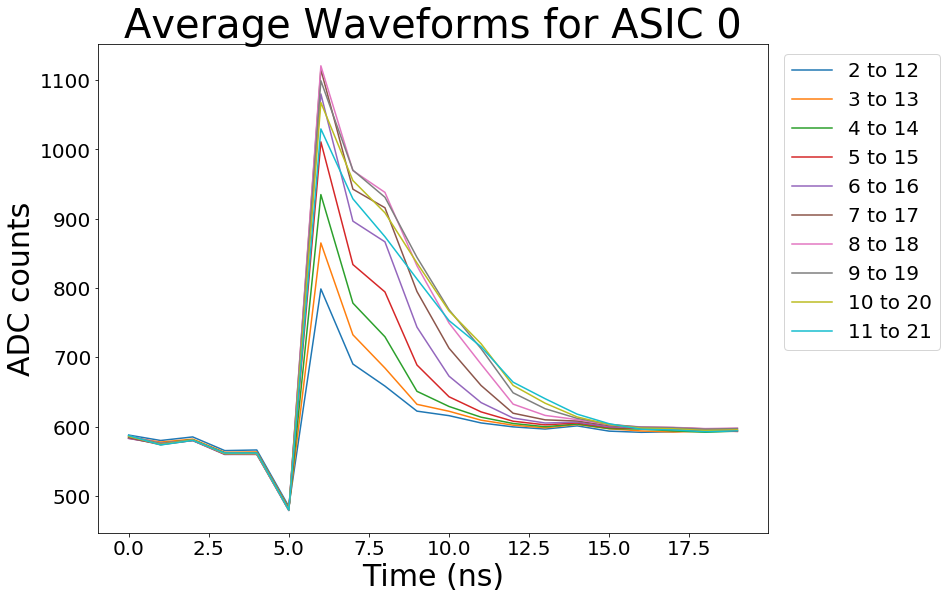

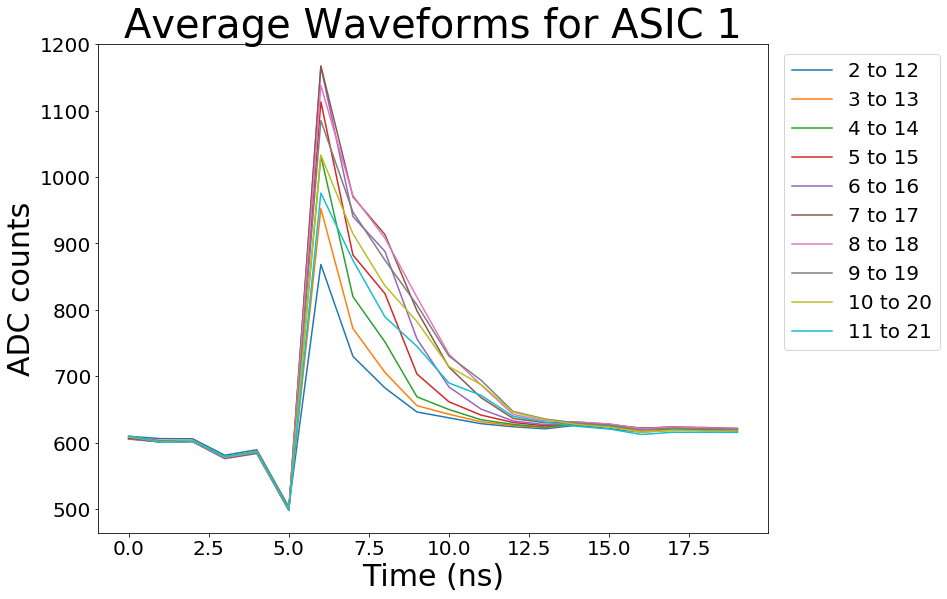

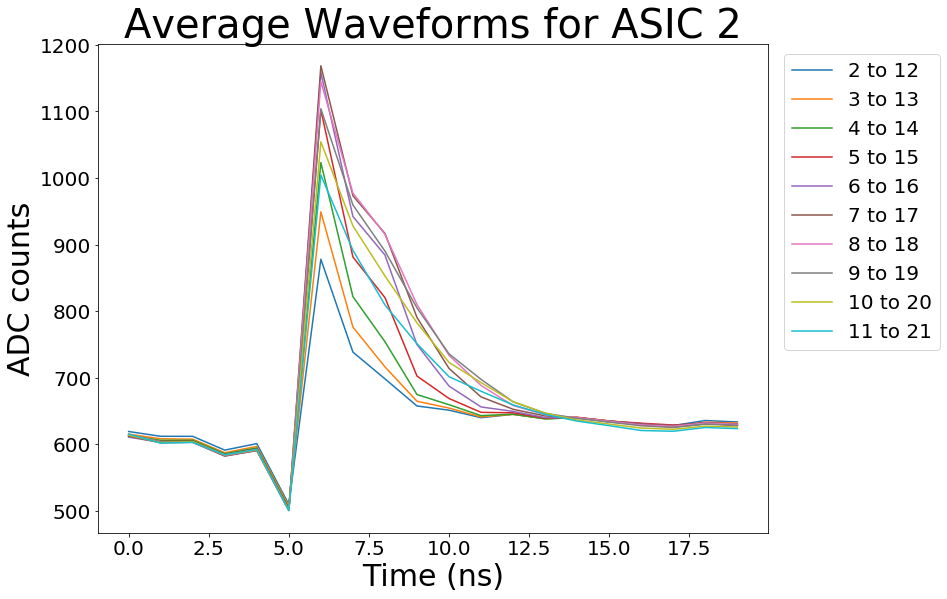

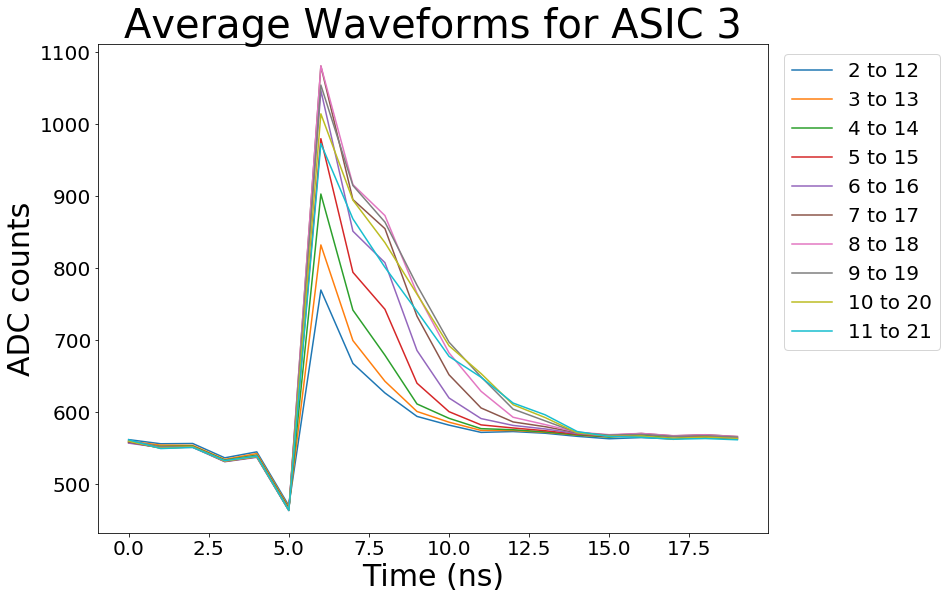

In [70]:
# Zoom in on just the first spike
# STRB2 steps

for ASIC in range(4):
    start_value = 2
    for run in range(10):
        plt.plot(ASIC_avgs_STRB2[ASIC][run][0:20], label = str(start_value) + ' to ' + str(start_value + 10))
        start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [78]:
## Incr1

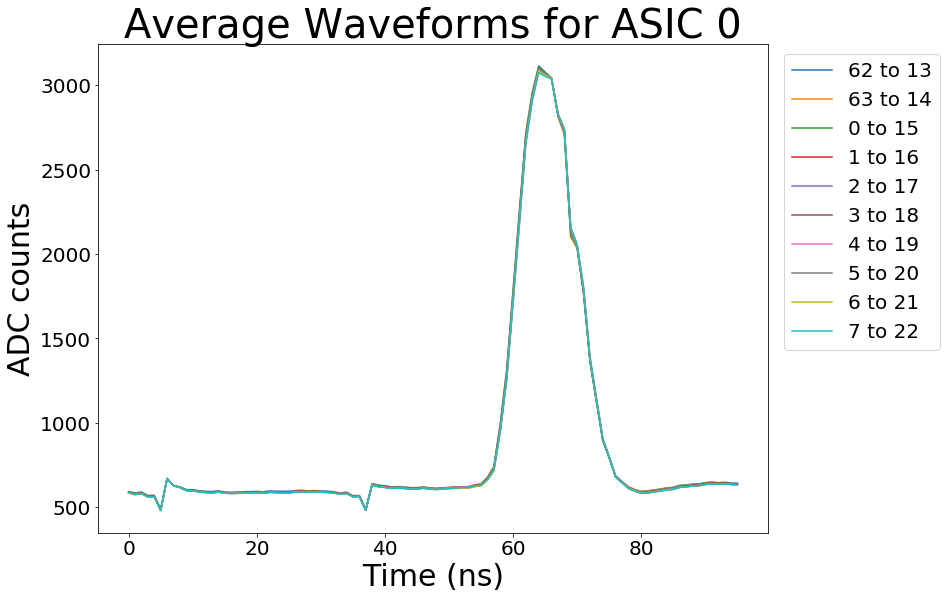

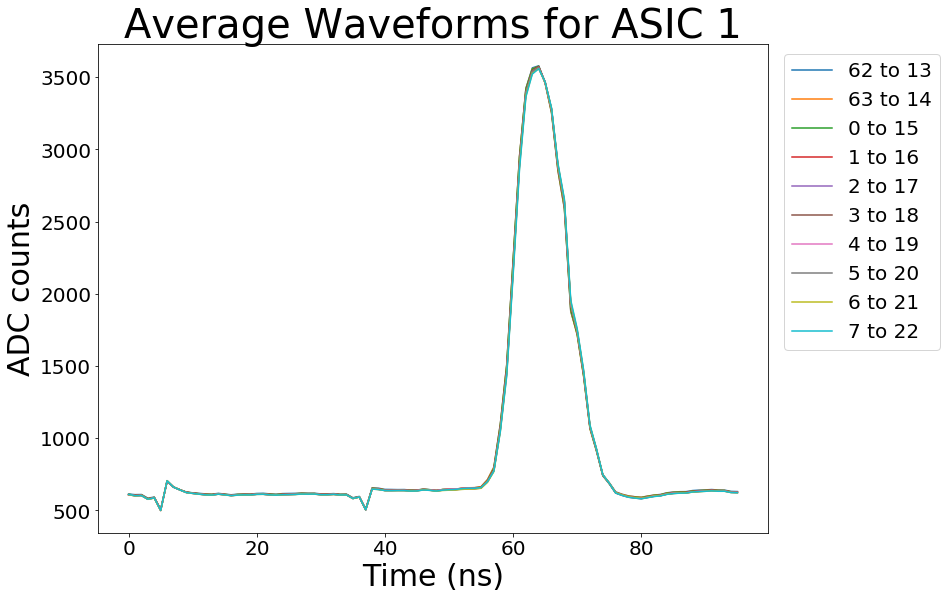

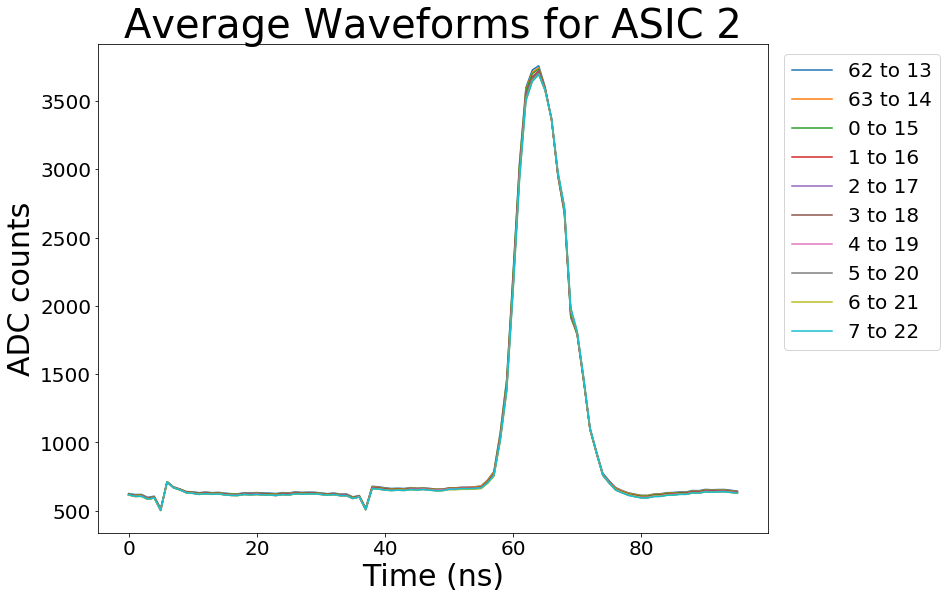

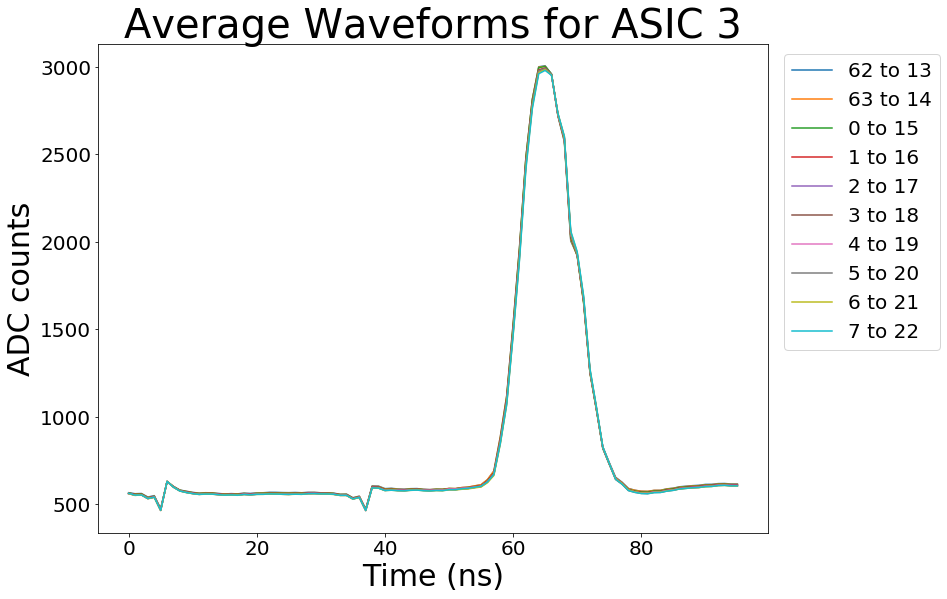

In [72]:
# Find and plot shifted average waveforms for each step
# Incr1 steps

ASIC_avgs_Incr1 = []
for ASIC in range(4):
    runs = []
    start_value = 62
    for run in range(0,10):
        d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches Incr1 Scan/sampleFileLarge_run31981" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(d[event][4])
            shift = 32-phase-1
            waveforms.append(d[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64))
        start_value = (start_value + 1)%64
    ASIC_avgs_Incr1.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

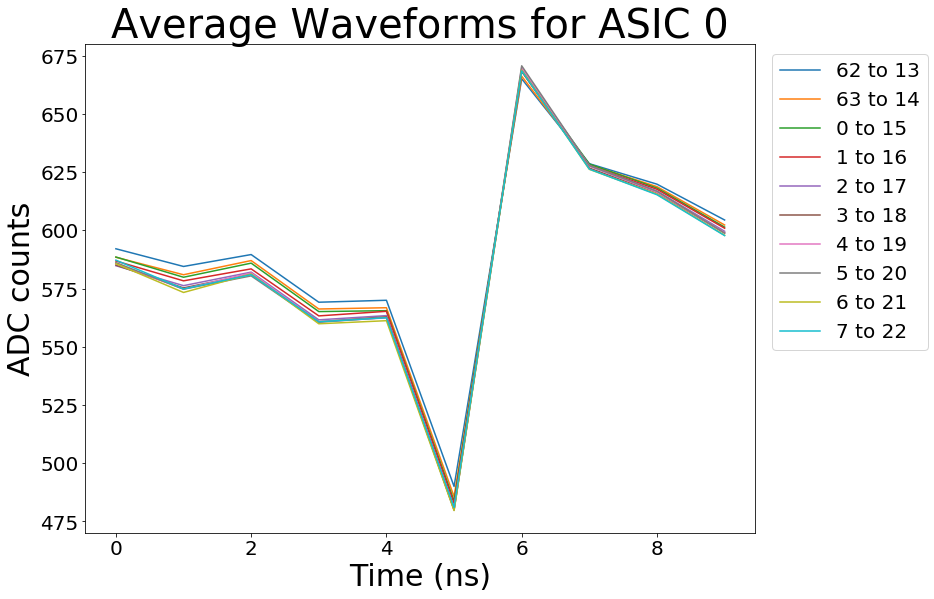

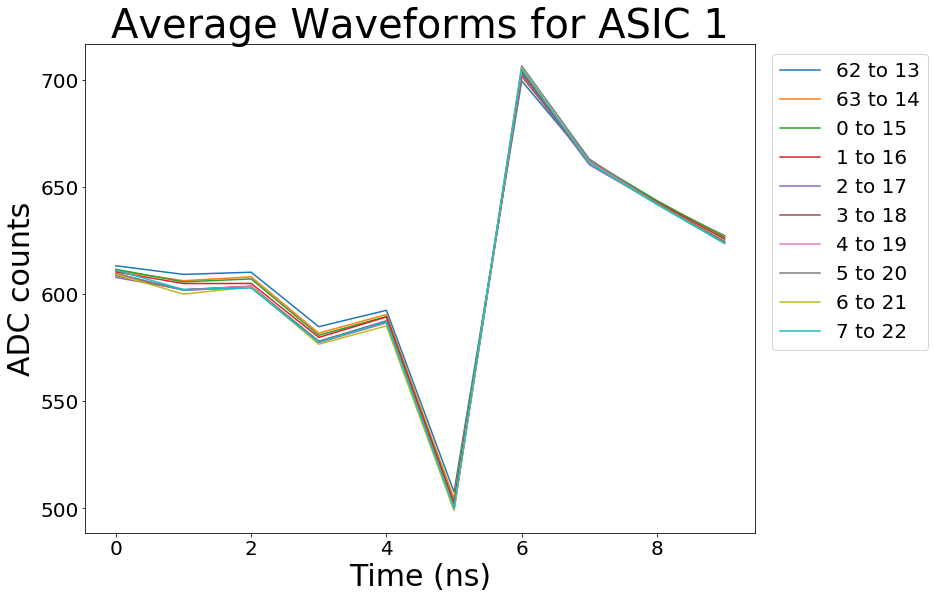

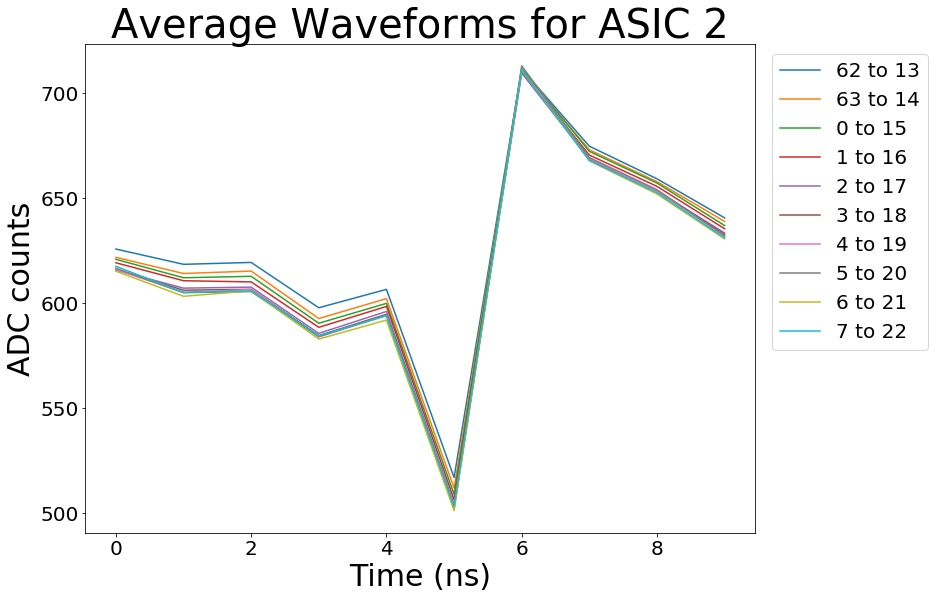

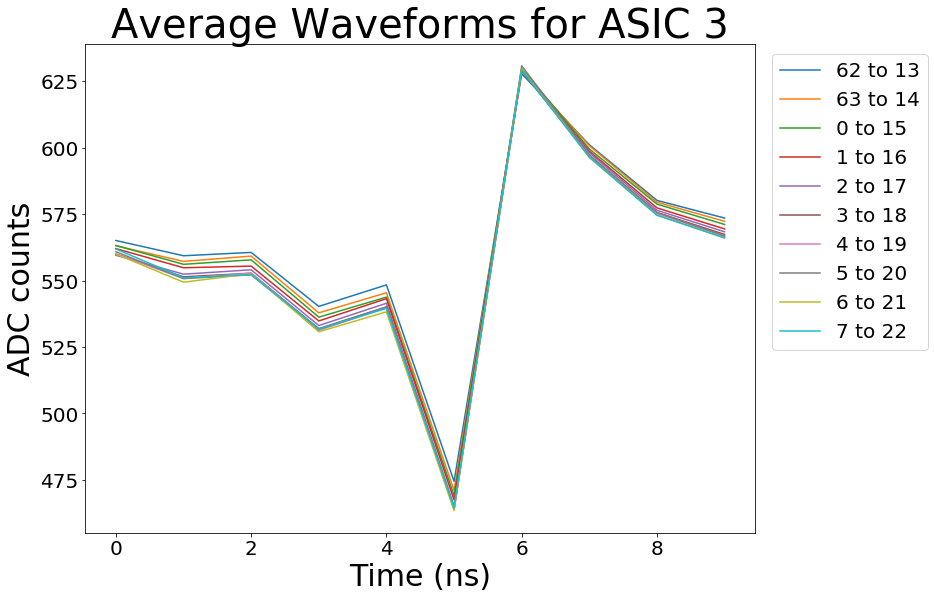

In [73]:
# Zoom in on just the first spike
# Incr1 steps

for ASIC in range(4):
    start_value = 62
    for run in range(10):
        plt.plot(ASIC_avgs_Incr1[ASIC][run][0:10], label = str(start_value) + ' to ' + str((start_value + 15)%64))
        start_value = (start_value + 1)%64
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [77]:
## Incr2

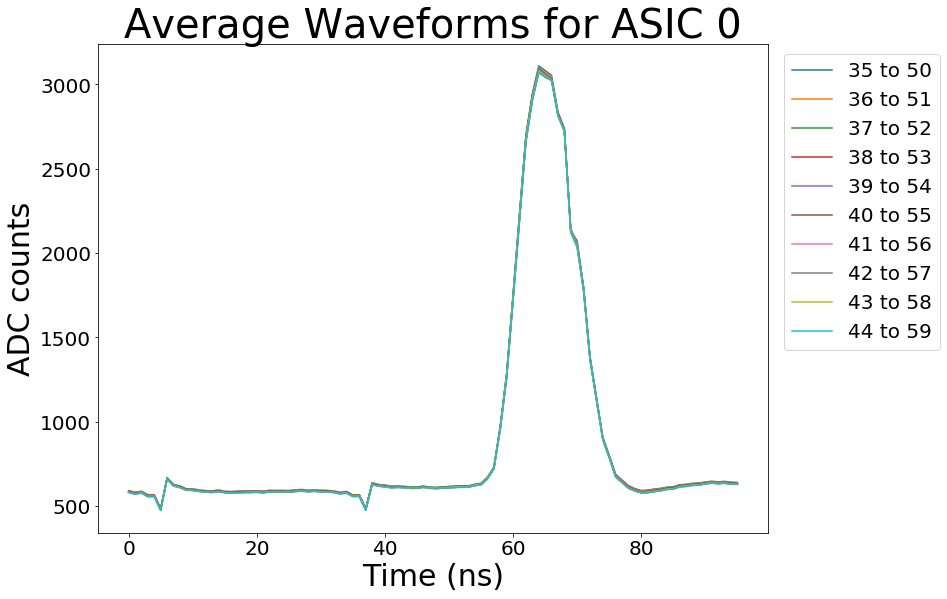

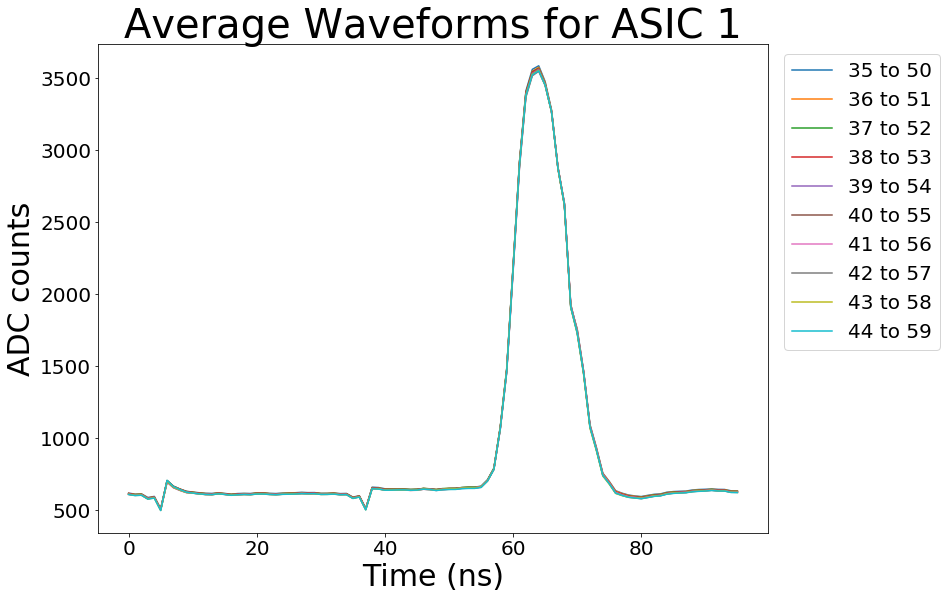

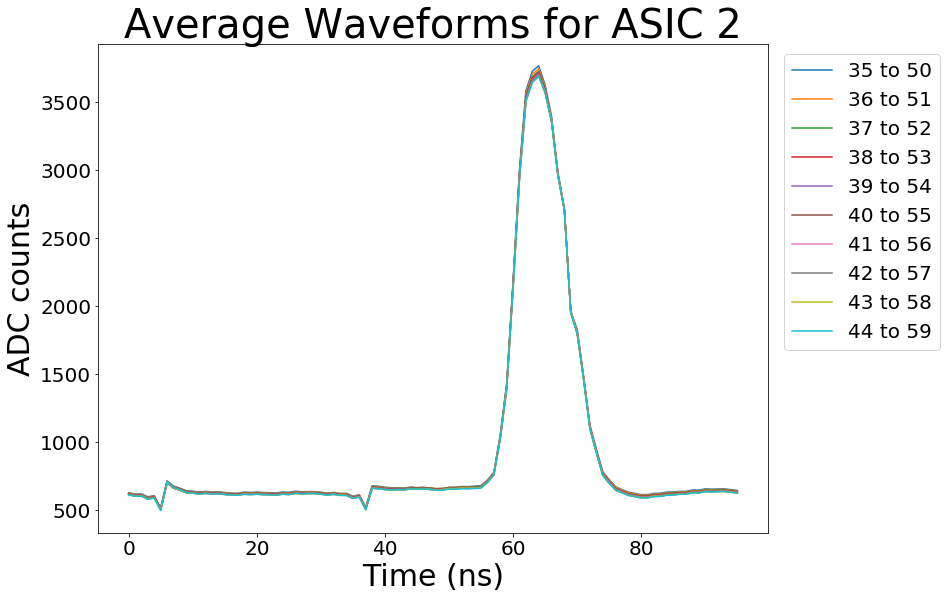

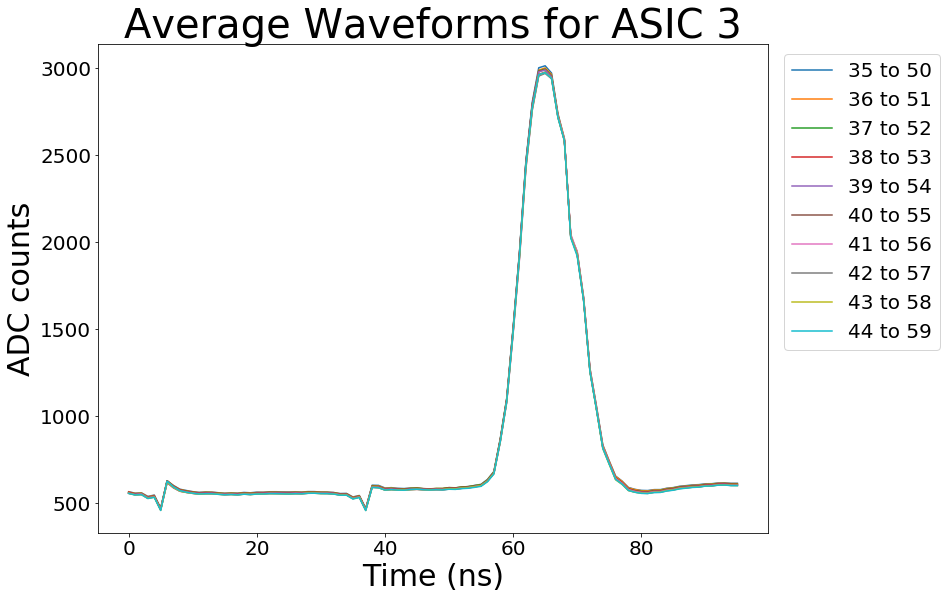

In [75]:
# Find and plot shifted average waveforms for each step
# Incr2 steps

ASIC_avgs_Incr2 = []
for ASIC in range(4):
    runs = []
    start_value = 35
    for run in range(0,10):
        d = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/Glitches Incr2 Scan/sampleFileLarge_run31982" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(d[event][4])
            shift = 32-phase-1
            waveforms.append(d[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64))
        start_value = (start_value + 1)%64
    ASIC_avgs_Incr2.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

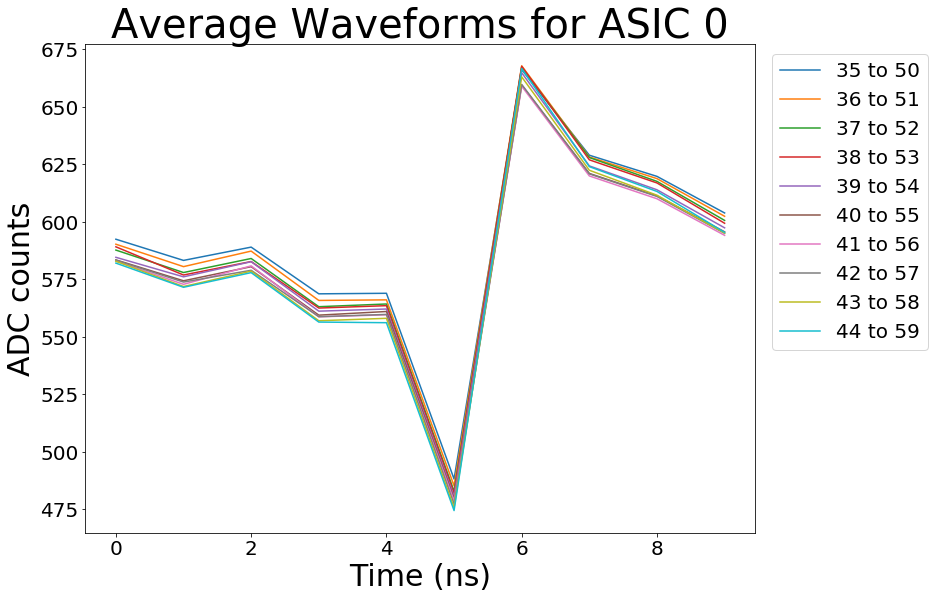

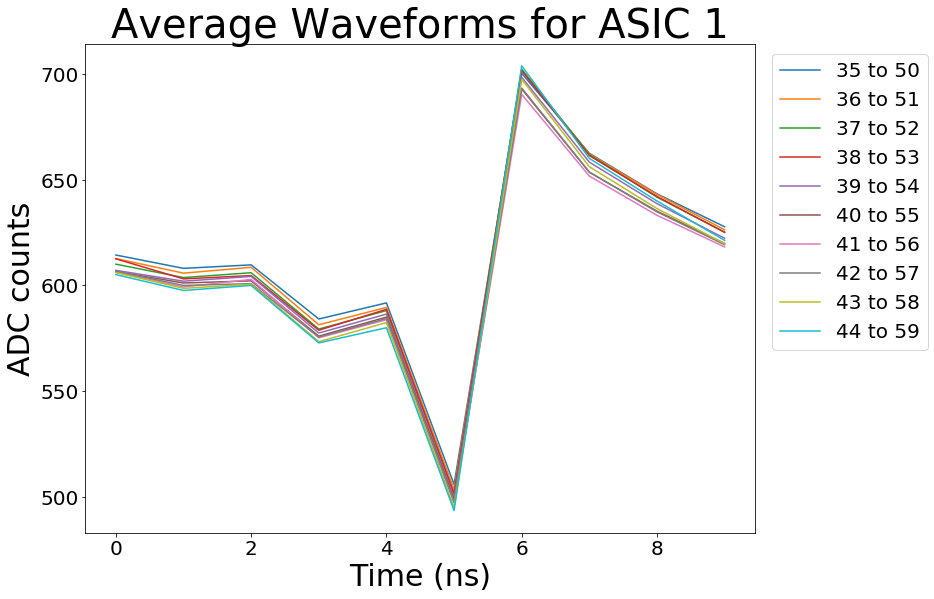

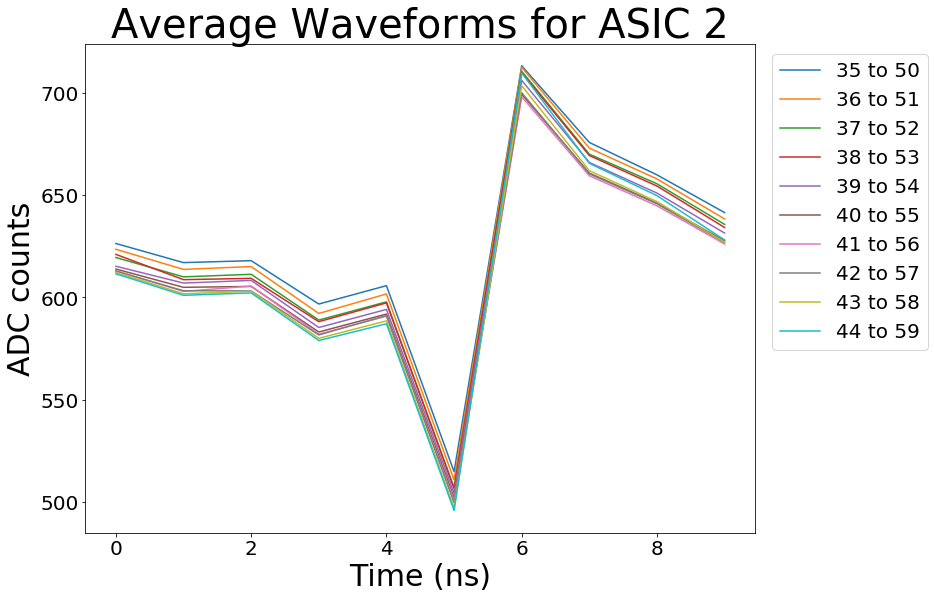

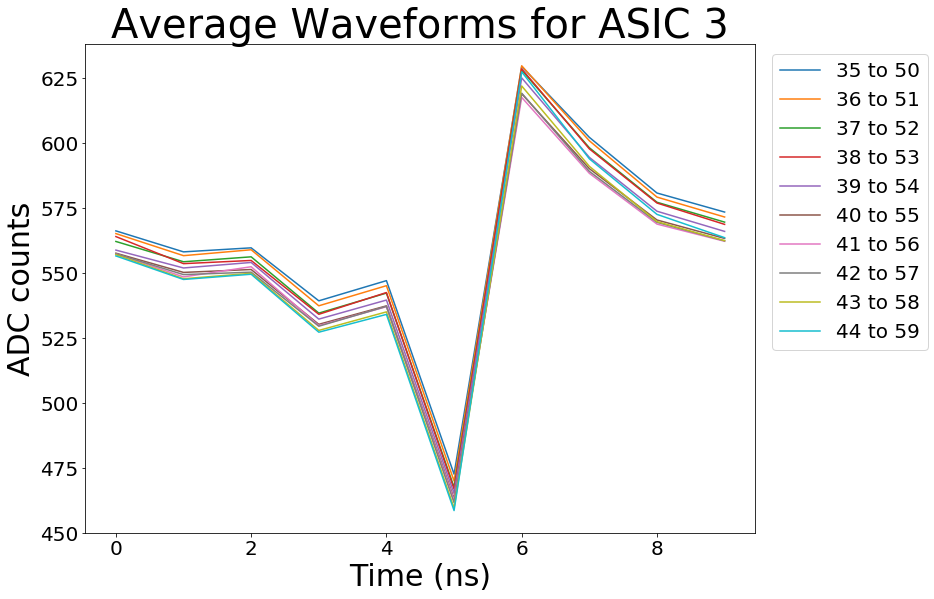

In [76]:
# Zoom in on just the first spike
# Incr2 steps

for ASIC in range(4):
    start_value = 35
    for run in range(10):
        plt.plot(ASIC_avgs_Incr2[ASIC][run][0:10], label = str(start_value) + ' to ' + str((start_value + 15)%64))
        start_value = (start_value + 1)%64
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()